# Colab Setup

Based on

https://guillermo-hidalgo-gadea.github.io/Seminar-ComputationalEthology/Part2VAME.html

## Prepare the Working Folder

Create a new folder in your drive, and name it "VAME Tutorial"
Create a subfolder in your

Open Google Drive in separate tab for better overview of directory structure: https://drive.google.com/drive/my-drive

Click on Runtime > Change runtime type and select GPU hardware acceleration. Check access to your GPU with the command below.

In [1]:
# If you have gpu enabled, then this code should work and will display a table with the available GPU
!nvidia-smi

Wed Sep 18 18:34:19 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.09                 Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   54C    P3             26W /  175W |     342MiB /  16384MiB |     20%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import some packages ...
import pip
import jupyter
import torchvision

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [3]:
# Install more packages ...
!pip3 install -U scikit-learn
!pip install pytest-shutil
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pathlib
!pip install pandas
!pip install ruamel.yaml

!pip install pyyaml
!pip install opencv-python-headless
!pip install h5py
!pip install umap
!pip install umap-learn
!pip install networkx
!pip install tqdm
!pip install hmmlearn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=7e3986708a260655029c2501fe27b60a9913454e86972778d9ebd07563e55dcf
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# !pip install ipympl
# !pip install ipywidgets

# from google.colab import output
# output.enable_custom_widget_manager()
# %matplotlib widget

In [6]:
# check pip installed packages
# !pip list -v

# Download and Install VAME

In [5]:
# Download VAME
!git clone https://github.com/gutzcha/vame_quantifying_behavior.git

# We are using a version of VAME that I created after some debugging...
# This will clone the git repository and the next step will install it

Cloning into 'vame_quantifying_behavior'...
remote: Enumerating objects: 1527, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1527 (delta 10), reused 20 (delta 8), pack-reused 1502 (from 1)
Receiving objects: 100% (1527/1527), 86.94 MiB | 21.41 MiB/s, done.
Resolving deltas: 100% (907/907), done.


In [6]:
!ls # Let's see what folder we have in the google drive, one of them should be vame_quantifying_behavior

drive  sample_data  vame_quantifying_behavior


In [7]:
!ls /content/vame_quantifying_behavior

examples  Images  LICENSE  materials  README.md  reinstall.sh  setup.py  vame  VAME.yaml


In [8]:
# Change dir to the downloaded repository
%cd /content/vame_quantifying_behavior
# Install more requierment related to the repo
!python setup.py install

/content/vame_quantifying_behavior
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-depre

In [9]:
# Cross your fingers and try to import the package
# Make sure the you are using CUDA!
import vame

/content/vame_quantifying_behavior/vame/analysis/tree_hierarchy.py:22: UserWarning: No Qt bindings
  warn("No Qt bindings")


# Download VAME Example Data

Create a folder in your google drive and name it "VAME_Example"

Download video-1.csv and video-1.mp4 from the assignment and save it to your own Google Drive, in the new folder.

# Step 1: Create a new VAME project

In [12]:
project = 'new_vame_project_20240918_2'  # Set a project name

In [13]:
working_directory = '/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example' # Set a working folder

In [14]:

# Here you pass a list of the videos paths (full paths),
# if you have many videos and they are all in a videos folder, use the following command to easily get a list of all the videos
# if you your videos are different than mp4, then change the type

# The commands

# from globe import glob
# import os
# glob(os.path.join('path/to/videos/folder','*.mp4'))

# Since we only have one video for this example, we will simply manually input the full path of the video
# videos = ['...] # Change this to the path where you saved the video! <= Complete code
videos = ['/content/drive/MyDrive/VAME_Example2/video-1.mp4']

In [16]:
# Let's make sure that the path you set is correct by running the following command

import os
if os.path.exists(videos[0]):
  print(f'The path to the video exists at\n{videos[0]}')
else:
  print(f'Incorrect path! please correct the path and try again')



The path to the video exists at
/content/drive/MyDrive/VAME_Example2/video-1.mp4


# Step 1.1: Initiazile a VAME Project

With the variables above, initialize a new project and save the path to the config.yaml file as config. This will create a new project folder with a predefined structure in your working_directory.

This should create four folders inside your working_directory folder:
- path\to\working\dir\videos:
    - The video files will be copied to this folder, the videos are used for visualisation and debugging.
    - it is not essential to have any video files, and in fact it slows down some of the processes, however, for your first usage, you should use video files to make sure that everything is in order.
- path\to\working\dir\data
    - The data folder stores generated data that will be created during pre-processing, when converting the data from csv files into numpy files
- path\to\working\dir\results
- path\to\working\dir\model
    - The results folder stores everything related to the model, including:
        - best_model :
        - model_losses
        - pretrained_model  

Before running this code, make sure the number of features correspond with your data's number of features as this can change depending on the number of keypoints in your pose skeleton.
If your data has 6 keypoint, then you have 12 features (x and y)


In [17]:
config = vame.init_new_project(project=project, videos=videos, working_directory=working_directory, videotype='.mp4', num_features=12)

Created "/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example/new_vame_project_20240918_2-Sep16-2024/videos"
Created "/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example/new_vame_project_20240918_2-Sep16-2024/data"
Created "/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example/new_vame_project_20240918_2-Sep16-2024/results"
Created "/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example/new_vame_project_20240918_2-Sep16-2024/model"
Copying the videos 

A VAME project has been created. 

Now its time to prepare your data for VAME. The first step is to move your pose .csv file (e.g. DeepLabCut .csv) into the //YOUR//VAME//PROJECT//videos//pose_estimation folder. From here you can call either the function vame.egocentric_alignment() or if your data is by design egocentric call vame.csv_to_numpy(). This will prepare the data in .csv into the right fo

Now that you initiated the project, it is time to copy the pose file(s) to the correct folder:


//YOUR//VAME//PROJECT//videos//pose_estimation folder

**Copy the video-1.csv file to this folder**

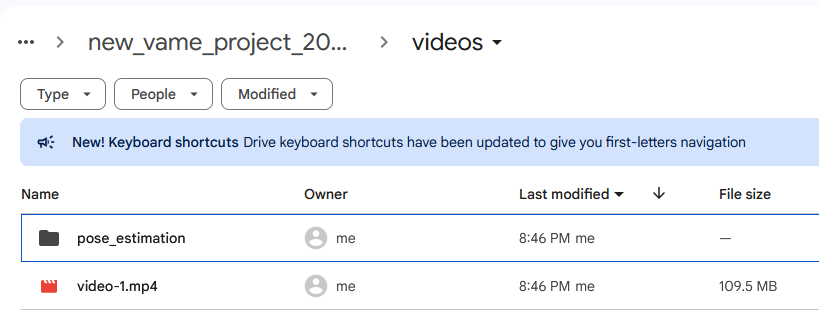

Alternatively, you can open an existing VAME project by linking to the existing config.yaml file
This is if you already initiated a project and want to continue from where you stopped

In [10]:
# config = '/YOUR/WORKING/DIRECTORY/NewVAMEProject_20211201/config.yaml'
config = '/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example/new_vame_project_20240918_2-Sep16-2024/config.yaml'

## Step 1.2: Get your data ready

First, move your DeepLabCut .csv data to the corresponding videos/pose_estimation/ directory.

Then, use the function below to align your behavior videos egocentrically given pose_ref_index as a list of reference coordinate for alignment. In this case [0,5]. Example: 0: snout, 1: forehand_left, 2: forehand_right, 3: hindleft, 4: hindright, 5: tail

You don't have to follow these specific feature names, the important thing is that all the columns in all your csv files contain the same features in the same order. After that, select two anchor point that can be used to align your data.
How to choose the anchor point:
- They have to be easily detected and not obscured by other body part
- The distance between the two points should be constant, for example, you can choose the nose tip and the trunk because the distance may change when the animal shifts their head.
- If you are going to use [0,5], make sure that you are accessing the correct features.

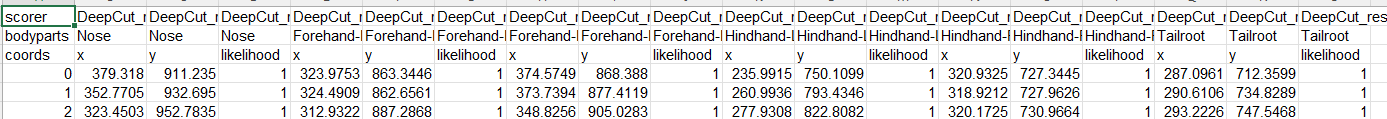

In [21]:
vame.egocentric_alignment(config, pose_ref_index=[0,5])

I am here: align_egocentrical.py
Here are the files: ['video-1']
Aligning data video-1, Pose confidence value: 0.99
I am here
dataFile: 
['/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example/new_vame_project_20240918_2-Sep16-2024/videos/pose_estimation/video-1.csv']


Align frames: 100%|██████████| 29997/29997 [01:46<00:00, 281.82it/s]


Your data is now ine right format and you can call vame.create_trainset()


# Step 1.3: Create the Training Set

Before training out model, we must first split our dataset into a traning and testing dataset. This will ensure that we do not train the model too much and cause overfitting

In [22]:
vame.create_trainset(config)


Creating training dataset...
Using robust setting to eliminate outliers! IQR factor: 4
Creating trainset from the vame.csv_to_numpy() output 
z-scoring of file video-1
IQR value: 1.28, IQR cutoff: 5.13
Lenght of train data: 26998
Lenght of test data: 2999
A training and test set has been created. Next step: vame.train_model()


# Step 2: Train your VAME Model

Now we will train the variational autoencoder model.
This will take a few minutes (or a few hours, or a few days, depending on the amount of data and compute)

In [23]:
vame.train_model(config)

Train Variational Autoencoder - model name: VAME 

Using CUDA
GPU active: True
GPU used:  Tesla T4
Latent Dimensions: 30, Time window: 30, Batch Size: 256, Beta: 1, lr: 0.0005

Compute mean and std for temporal dataset.
Initialize train data. Datapoints 26998
Initialize test data. Datapoints 2999
Scheduler step size: 100, Scheduler gamma: 0.20

Start training... 
Epoch: 1


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Train loss: 23065.877, MSE-Loss: 14655.143, MSE-Future-Loss 8410.734, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 1976.569, MSE-Loss: 1976.569, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 2
Train loss: 10393.987, MSE-Loss: 6288.400, MSE-Future-Loss 4105.587, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 1790.578, MSE-Loss: 1790.578, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 3
Train loss: 8786.365, MSE-Loss: 5198.706, MSE-Future-Loss 3586.194, KL-Loss: 1.061, Kmeans-Loss: 0.403, weight: 0.25
Test loss: 1694.804, MSE-Loss: 1693.155, KL-Loss: 1.287, Kmeans-Loss: 0.362


Epoch: 4
Train loss: 8119.882, MSE-Loss: 4702.509, MSE-Future-Loss 3414.296, KL-Loss: 2.274, Kmeans-Loss: 0.804, weight: 0.50
Test loss: 1595.485, MSE-Loss: 1592.083, KL-Loss: 2.675, Kmeans-Loss: 0.726


Epoch: 5
Train loss: 7544.316, MSE-Loss: 4294.939, MSE-Future-Loss 3244.555, KL-Loss: 3.583, Kmeans-Loss: 1.238, weight: 0.75
Test loss: 1507.183, MSE-Loss: 1501.884, KL-Loss: 4.162, Kmeans-

# Step 3: Evaluate the model

After training the model, let us evaulate it on the test dataset

Using CUDA
GPU active: True
GPU used: Tesla T4


Evaluation of VAME model. 

Initialize test data. Datapoints 2999


/content/vame_quantifying_behavior/vame/model/evaluate.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(cfg['project_path'

You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.pose_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


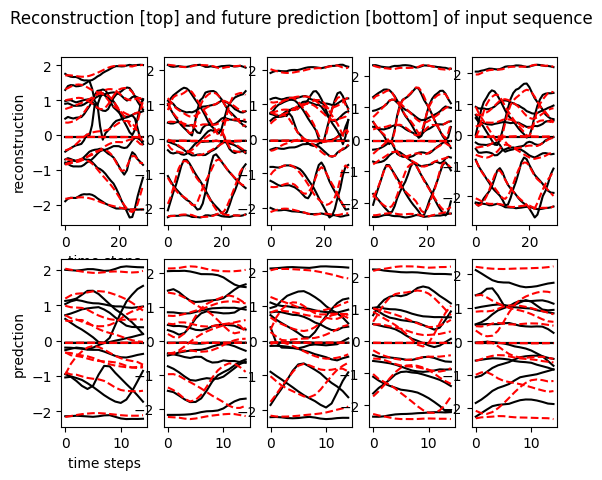

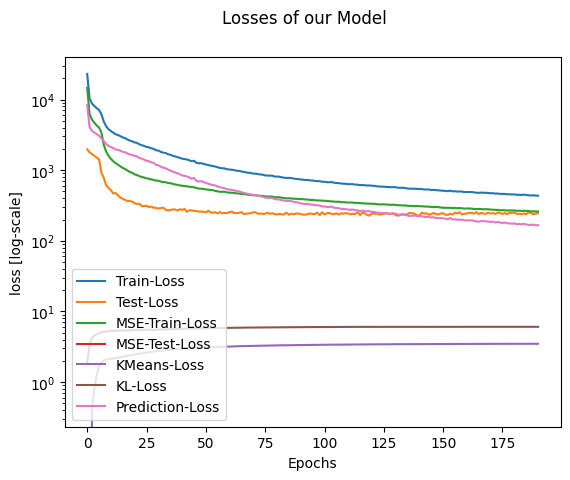

In [24]:
vame.evaluate_model(config)


# Step 4: Motif segmentation

The next step is to use the tranined model to segment out data into motif.
This is done by following the next steps:
1. Extract embedding (latent vectors) of each sample using the variational encoder
2. fit a hmm.GaussianHMM
3. use the trained hmm model to label each sample

In [25]:
vame.pose_segmentation(config)

/content/vame_quantifying_behavior/vame/analysis/pose_segmentation.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(cfg['pr

Pose segmentation for VAME model: VAME 

Using CUDA
GPU active: True
GPU used: Tesla T4
Embedding of latent vector for file video-1


100%|██████████| 29967/29967 [00:55<00:00, 538.99it/s]


For all animals the same parameterization of latent vectors is applied for 15 cluster
Using a HMM as parameterization!
/content/drive/MyDrive/Quantifying natural behavior - unsupervised learning/VAME_Example/new_vame_project_20240918_2-Sep16-2024/results/video-1/VAME/hmm-15/
You succesfully extracted motifs with VAME! From here, you can proceed running vame.motif_videos() 


# Step 5: Create Motif Videos

The next step creats motif videos.
After labeling each vidoe segment, this step will aggregate videos segments with the same label, and create a video clip for each class.

You will have to watch the videos in these classes and label them manualy.

In [27]:
vame.motif_videos(config, videoType='.mp4')


Cluster size is: 15 
Motif videos getting created for video-1 ...
fps: 25.0
Cluster: 0


100%|██████████| 1000/1000 [00:42<00:00, 23.70it/s]


Cluster: 1


100%|██████████| 1000/1000 [00:42<00:00, 23.67it/s]


Cluster: 2


100%|██████████| 1000/1000 [00:43<00:00, 23.21it/s]


Cluster: 3


100%|██████████| 1000/1000 [00:43<00:00, 23.22it/s]


Cluster: 4


100%|██████████| 1000/1000 [00:44<00:00, 22.46it/s]


Cluster: 5


100%|██████████| 1000/1000 [00:42<00:00, 23.36it/s]


Cluster: 6


100%|██████████| 1000/1000 [00:44<00:00, 22.67it/s]


Cluster: 7


100%|██████████| 1000/1000 [00:48<00:00, 20.60it/s]


Cluster: 8


100%|██████████| 1000/1000 [00:50<00:00, 19.65it/s]


Cluster: 9


100%|██████████| 1000/1000 [00:52<00:00, 18.94it/s]


Cluster: 10


100%|██████████| 1000/1000 [00:51<00:00, 19.55it/s]


Cluster: 11


100%|██████████| 1000/1000 [00:51<00:00, 19.40it/s]


Cluster: 12


100%|██████████| 1000/1000 [00:51<00:00, 19.41it/s]


Cluster: 13


100%|██████████| 1000/1000 [00:53<00:00, 18.73it/s]


Cluster: 14


100%|██████████| 1000/1000 [00:47<00:00, 20.88it/s]

All videos have been created!


# Step 6: Create behavioral hierarchies



In [29]:
!ls

build  examples  LICENSE    README.md	  setup.py  vame.egg-info
dist   Images	 materials  reinstall.sh  vame	    VAME.yaml


In [30]:
! git pull

remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 10 (delta 8), reused 10 (delta 8), pack-reused 0 (from 0)
Unpacking objects: 100% (10/10), 886 bytes | 221.00 KiB/s, done.
From https://github.com/gutzcha/vame_quantifying_behavior
   5cc09fe..f35f413  QuantifyingBehavior -> origin/QuantifyingBehavior
Updating 5cc09fe..f35f413
Fast-forward
 vame/analysis/tree_hierarchy.py | 5 ++++-
 vame/util/align_egocentrical.py | 4 +++-
 2 files changed, 7 insertions(+), 2 deletions(-)


In [37]:
import importlib
importlib.reload(vame)
import vame

UMAP calculation for file video-1
Embedding 29967 data points..


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Embedding 29967 data points..


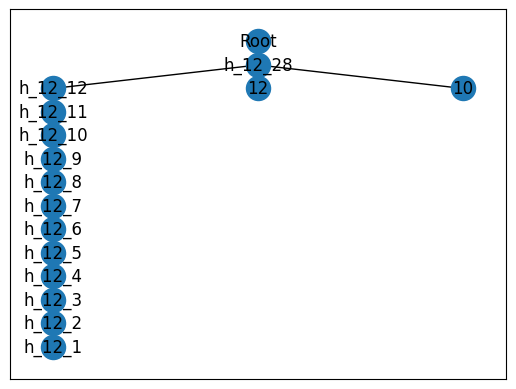

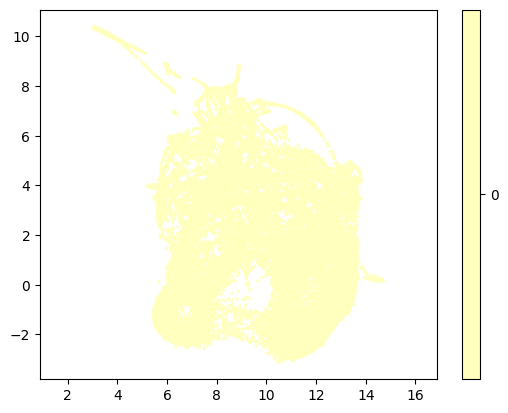

In [11]:
vame.community(config, show_umap=True, cut_tree=2)


# Step 7: Create community videos


In [12]:
vame.community_videos(config, videoType='.mp4')


Cluster size is: 15 
Community videos getting created for video-1 ...
fps: 25.0
Cluster: 0


100%|██████████| 1000/1000 [00:34<00:00, 28.73it/s]


Cluster: 1


0it [00:00, ?it/s]


Cluster: 2


0it [00:00, ?it/s]


Cluster: 3


0it [00:00, ?it/s]


Cluster: 4


0it [00:00, ?it/s]


Cluster: 5


0it [00:00, ?it/s]


Cluster: 6


0it [00:00, ?it/s]


Cluster: 7


0it [00:00, ?it/s]


Cluster: 8


0it [00:00, ?it/s]


Cluster: 9


0it [00:00, ?it/s]


Cluster: 10


0it [00:00, ?it/s]


Cluster: 11


0it [00:00, ?it/s]


Cluster: 12


0it [00:00, ?it/s]


Cluster: 13


0it [00:00, ?it/s]


Cluster: 14


0it [00:00, ?it/s]


All videos have been created!


# Step 8: Create UMAP visualization


Compute embedding for file video-1
Embedding 29967 data points..


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Visualizing 29967 data points.. 


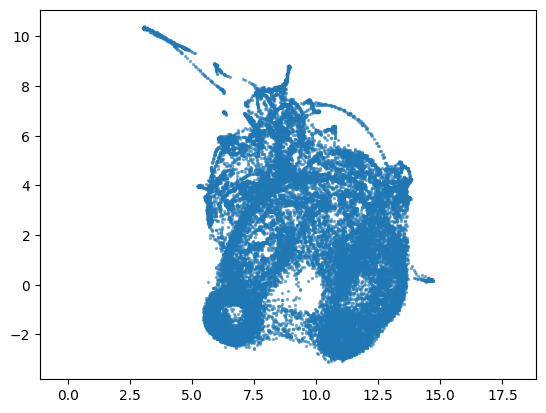

In [13]:
vame.visualization(config, label=None) #options: label: None, "motif", "community"


# Step 9: Create GIF Animation


In [ ]:
# Note: This function is currently very slow. Once the frames are saved you can create a video
# or gif via e.g. ImageJ or other tools
# vame.gif(config, pose_ref_index=[0,5], subtract_background=True, start=None,
#          length=500, max_lag=30, label='community', file_format='.mp4', crop_size=(300,300))

vame.gif(config, pose_ref_index=[0,5], subtract_background=True, start=None,
         length=500, max_lag=30, label='community', file_format='.mp4', crop_size=(300,300))

Loading background image ...
Can't find background image... Calculate background image...


Compute background image for video video-1: 100%|██████████| 1000/1000 [00:46<00:00, 21.52it/s]


Finishing up!


# Step 10: Create a generative model

In [1]:
vame.generative_model(config, mode="centers") #options: mode: "sampling", "reconstruction", "centers", "motifs"


NameError: name 'vame' is not defined

# Well Done!